# Neural Networks and Multi-class Classification

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy import optimize
import utils
import os

grader = utils.Grader()

%matplotlib inline

In [ ]:
input_layer_size  = 400
num_labels = 10
data = loadmat("ex3data1.mat")
X, y = data['X'], data['y'].ravel()
print(X)
y[y==10] = 0
m = y.size
print(y)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[0 0 0 ... 9 9 9]


In [ ]:
def displayNumbers(data):
    if data.ndim == 2:
        m, n = data.shape
    else:
        m = 1
        n = data.size
        data = data[None]

    single_width = int(np.round(np.sqrt(n)))
    single_height = n/single_width

    rows = int(np.floor(np.sqrt(m)))
    cols = int(np.ceil(m/rows))

    fig, axes_arr = plt.subplots(rows, cols, figsize = (10, 10))
    fig.subplots_adjust(wspace=0.025, hspace=0.3)

    axes_arr = [axes_arr] if m == 1 else axes_arr.ravel()
    # print(data)
    for i, axs in enumerate(axes_arr):
        axs.imshow(data[i].reshape(single_width, single_width, order='F'),
                  cmap='Greys', extent=[0, 1, 0, 1])
        axs.axis('off')

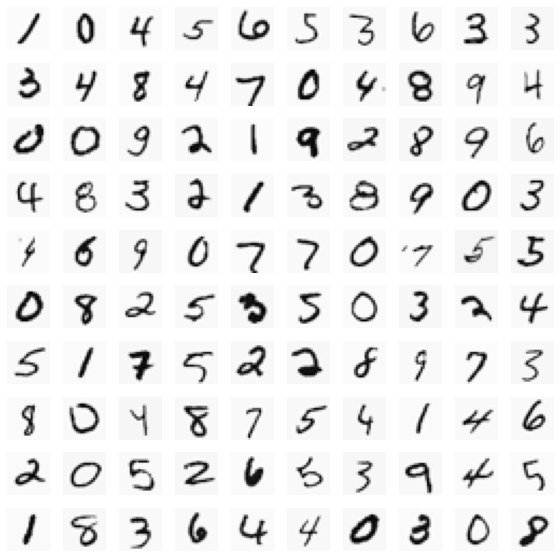

In [ ]:
rand_idx = np.random.choice(m, 100, replace=False)
rand_img = X[rand_idx, :]
displayNumbers(rand_img)

In [ ]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

In [ ]:
# test values for the parameters theta
theta_t = np.array([-2, -1, 1, 2], dtype=float)

# test values for the inputs
X_t = np.concatenate([np.ones((5, 1)), np.arange(1, 16).reshape(5, 3, order='F')/10.0], axis=1)

# test values for the labels
y_t = np.array([1, 0, 1, 0, 1])

# test value for the regularization parameter
lambda_t = 3

In [ ]:
def lrCostFunction(theta, X, y, lambda_):
    m = y.size
    if y.dtype == bool:
        y = y.astype(int)
    J = 0
    grad = np.zeros(theta.shape)
    h = sigmoid(np.dot(X, theta))
    temp = theta.copy() #removing theta[0]
    temp[0] = 0
    J = np.sum((np.dot(-y, np.log(h)) - (np.dot(1-y, np.log(1-h))))/m) + np.sum(((lambda_)*np.square(temp))/(2*m))
    grad = (np.dot(h-y, X) + (lambda_*temp))/m

    return J, grad

J, grad = lrCostFunction(theta_t, X_t, y_t, lambda_t)

print('Cost         : {:.6f}'.format(J))
print('Expected cost: 2.534819')
print('-----------------------')
print('Gradients:')
print(' [{:.6f}, {:.6f}, {:.6f}, {:.6f}]'.format(*grad))
print('Expected gradients:')
print(' [0.146561, -0.548558, 0.724722, 1.398003]');

Cost         : 2.534819
Expected cost: 2.534819
-----------------------
Gradients:
 [0.146561, -0.548558, 0.724722, 1.398003]
Expected gradients:
 [0.146561, -0.548558, 0.724722, 1.398003]


In [ ]:
# appends the implemented function in part 1 to the grader object
grader[1] = lrCostFunction

# send the added functions to coursera grader for getting a grade on this part
grader.grade()


Submitting Solutions | Programming Exercise multi-class-classification-and-neural-networks

Login (email address): deepesh.1905g2@gmail.com
Token: e1FrO5MyWp4lDRXF
                                  Part Name |     Score | Feedback
                                  --------- |     ----- | --------
         Neural Network Prediction Function |  30 /  30 | Nice work!
            Regularized Logistic Regression |   0 /  20 | Your answer is incorrect.
             One-vs-All Classifier Training |   0 /  20 | Your answer is incorrect.
           One-vs-All Classifier Prediction |   0 /  30 | Your answer is incorrect.
                                  --------------------------------
                                            |  30 / 100 |  



In [ ]:
def oneVsAll(X, y, num_labels, lambda_):
    # Some useful variables
    m, n = X.shape
    
    # You need to return the following variables correctly 
    all_theta = np.zeros((num_labels, n + 1))
    initial_theta = np.zeros(n+1)

    # Add ones to the X data matrix
    X = np.concatenate([np.ones((m, 1)), X], axis=1)

    options = {"maxiter": 50}

    for i in range(num_labels):
        y_temp = y==i
        res = optimize.minimize(lrCostFunction,
                                initial_theta, 
                                (X, y_temp, lambda_),
                                jac=True,
                                method='CG', 
                                options=options)
        all_theta[i] = res.x
        initial_theta = np.zeros(n+1)
    return all_theta

In [ ]:
lambda_ = 0.1
all_theta = oneVsAll(X, y, num_labels, lambda_)

In [ ]:
grader[2] = oneVsAll
grader.grade()


Submitting Solutions | Programming Exercise multi-class-classification-and-neural-networks

Use token from last successful submission (deepesh.1905g2@gmail.com)? (Y/n): y
                                  Part Name |     Score | Feedback
                                  --------- |     ----- | --------
         Neural Network Prediction Function |  30 /  30 | Nice work!
            Regularized Logistic Regression |  20 /  20 | Nice work!
             One-vs-All Classifier Training |   0 /  20 | Your answer is incorrect.
           One-vs-All Classifier Prediction |   0 /  30 | Your answer is incorrect.
                                  --------------------------------
                                            |  50 / 100 |  



In [ ]:
def predictOneVsAll(all_theta, X):
    m = X.shape[0];
    num_labels = all_theta.shape[0]

    # You need to return the following variables correctly 
    p = np.zeros(m)

    # Add ones to the X data matrix
    X = np.concatenate([np.ones((m, 1)), X], axis=1)

    p = np.argmax(sigmoid(X.dot(all_theta.T)), axis = 1)

    return p

In [ ]:
pred = predictOneVsAll(all_theta, X)
print('Training Set Accuracy: {:.2f}%'.format(np.mean(pred == y) * 100))

Training Set Accuracy: 95.12%


In [ ]:
grader[3] = predictOneVsAll
grader.grade()


Submitting Solutions | Programming Exercise multi-class-classification-and-neural-networks

Use token from last successful submission (deepesh.1905g2@gmail.com)? (Y/n): y
                                  Part Name |     Score | Feedback
                                  --------- |     ----- | --------
         Neural Network Prediction Function |  30 /  30 | Nice work!
            Regularized Logistic Regression |  20 /  20 | Nice work!
             One-vs-All Classifier Training |  20 /  20 | Nice work!
           One-vs-All Classifier Prediction |   0 /  30 | Your answer is incorrect.
                                  --------------------------------
                                            |  70 / 100 |  



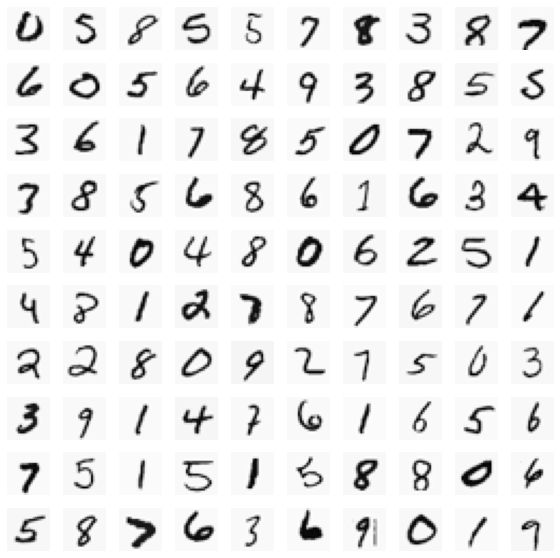

In [ ]:
#  training data stored in arrays X, y
data = loadmat('ex3data1.mat')
X, y = data['X'], data['y'].ravel()
y[y == 10] = 0

m = y.size

rand_idx = np.random.choice(m, 100, replace=False)
rand_data = X[rand_idx, :]

displayNumbers(rand_data)

In [ ]:
input_layer_size  = 400  # 20x20 Input Images of Digits
hidden_layer_size = 25   # 25 hidden units
num_labels = 10          # 10 labels, from 0 to 9
weights = loadmat('ex3weights.mat')

Theta1, Theta2 = weights['Theta1'], weights['Theta2']

# swap first and last columns of Theta2, due to legacy from MATLAB indexing, 
# since the weight file ex3weights.mat was saved based on MATLAB indexing
Theta2 = np.roll(Theta2, 1, axis=0)

In [ ]:
def predict(Theta1, Theta2, X):
    """
    Return 
    ------
    p : array_like
        Predictions vector containing the predicted label for each example.
        It has a length equal to the number of examples.
    
    Instructions
    ------------
    Complete the following code to make predictions using your learned neural
    network. You should set p to a vector containing labels 
    between 0 to (num_labels-1).
     
    Hint
    ----
    This code can be done all vectorized using the numpy argmax function.
    In particular, the argmax function returns the index of the  max element,
    for more information see '?np.argmax' or search online. If your examples
    are in rows, then, you can use np.argmax(A, axis=1) to obtain the index
    of the max for each row.
    
    Note
    ----
    Remember, we have supplied the `sigmoid` function in the `utils.py` file. 
    You can use this function by calling `utils.sigmoid(z)`, where you can 
    replace `z` by the required input variable to sigmoid.
    """
    if X.ndim == 1:
        X = X[None]
    m = X.shape[0]
    num_labels = Theta2.shape[0]
    p = np.zeros(X.shape[0])
    X = np.concatenate([np.ones((m, 1)), X], axis=1)
    
    a2 = utils.sigmoid(X.dot(Theta1.T))
    a2 = np.concatenate([np.ones((a2.shape[0], 1)), a2], axis=1)
    
    p = np.argmax(utils.sigmoid(a2.dot(Theta2.T)), axis = 1)
    return p

pred = predict(Theta1, Theta2, X)
print('Training Set Accuracy: {:.1f}%'.format(np.mean(pred == y) * 100))

Training Set Accuracy: 97.5%


[ 532 1661 3803 ... 3462 2777 2950]
Neural Network Prediction: 1


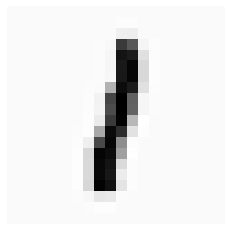

In [ ]:
indices = np.random.permutation(m)
print(indices)
if indices.size > 0:
    i, indices = indices[0], indices[1:]
    utils.displayData(X[i, :], figsize=(4, 4))
    pred = predict(Theta1, Theta2, X[i, :])
    print('Neural Network Prediction: {}'.format(*pred))
else:
    print('No more images to display!')

In [ ]:
grader[4] = predict
grader.grade()


Submitting Solutions | Programming Exercise multi-class-classification-and-neural-networks

Use token from last successful submission (deepesh.1905g2@gmail.com)? (Y/n): n
Login (email address): deepesh.1905g2@gmail.com
Token: thDsuCGnX0Mqf9gS
                                  Part Name |     Score | Feedback
                                  --------- |     ----- | --------
         Neural Network Prediction Function |  30 /  30 | Nice work!
            Regularized Logistic Regression |  20 /  20 | Nice work!
             One-vs-All Classifier Training |  20 /  20 | Nice work!
           One-vs-All Classifier Prediction |  30 /  30 | Nice work!
                                  --------------------------------
                                            | 100 / 100 |  

